In [46]:
# import libraries

import pandas as pd
import numpy as np
import scipy.stats as st
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import scipy.stats as st



In [2]:
# retrieving the data from xls

data = pd.read_csv('data-collection.csv')

In [3]:
data.head()

,Time,Group,Age,Confidence,Gender,Bag Size
0,10:50,1,70,95,F,Medium
1,10:52,1,60,90,F,Large
2,10:53,1,70,95,M,Small
3,10:53,1,50,95,M,Large
4,10:56,1,60,90,F,Medium


In [4]:
# loading the data into mysql

host="localhost"
port=3306
dbname="project6"
user="root"
password="1234"



engine = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'
            .format(user, password,host, dbname)).connect()


In [5]:
data.to_sql('supermarket', con = engine,if_exists = 'replace')

In [6]:
# extracting the data

query = pd.read_sql_query("""SELECT * FROM supermarket;
""", engine)

data = query

In [8]:
# Data Cleaning

def agegroup(row):
    if row >= 70:
        return 'Old'
    elif row <= 30:
        return 'Young'
    else:
        return 'Middle Aged'
    

In [10]:
data['Age group'] = data['Age'].apply(agegroup)

data['Age group'].value_counts()

Middle Aged    72
Young          22
Old            19
Name: Age group, dtype: int64

In [17]:
def daytime(row):
    date_time_obj = datetime.datetime.strptime(row, '%H:%M')

    if date_time_obj <= datetime.datetime.strptime('12:00', '%H:%M'):
        return 'Morning'
    elif date_time_obj >= datetime.datetime.strptime('19:00', '%H:%M'):
        return 'Night'
    else:
        return 'Afternoon'


In [18]:
data['Time of the Day'] = data['Time'].apply(daytime)

data.head()

,index,Time,Group,Age,Confidence,Gender,Bag Size,Age group,Time of the Day
0,0,10:50,1,70,95,F,Medium,Old,Morning
1,1,10:52,1,60,90,F,Large,Middle Aged,Morning
2,2,10:53,1,70,95,M,Small,Old,Morning
3,3,10:53,1,50,95,M,Large,Middle Aged,Morning
4,4,10:56,1,60,90,F,Medium,Middle Aged,Morning


In [28]:
def group(row):
    if row > 1:
        return 'Not alone'
    else:
        return 'Alone'

In [29]:
data['Alone?'] = data['Group'].apply(group)

In [30]:
data_clean = data[['index','Alone?','Confidence','Gender','Bag Size','Age group','Time of the Day']]

In [31]:
# EDA

data_clean.dtypes

index               int64
Alone?             object
Confidence          int64
Gender             object
Bag Size           object
Age group          object
Time of the Day    object
dtype: object

In [32]:
data_clean['Gender'].value_counts()

F    70
M    43
Name: Gender, dtype: int64

In [33]:
data_clean['Bag Size'].value_counts()

Small         42
Medium        38
Large         27
Very Large     6
Name: Bag Size, dtype: int64

In [34]:
data_clean['Alone?'].value_counts()

Alone        82
Not alone    31
Name: Alone?, dtype: int64

In [21]:
data_clean.describe()

,index,Group,Confidence
count,113.00000,113.000000,113.000000
mean,56.00000,1.353982,91.070796
std,32.76431,0.625648,3.496725
min,0.00000,1.000000,80.000000
25%,28.00000,1.000000,90.000000
50%,56.00000,1.000000,90.000000
75%,84.00000,2.000000,95.000000
max,112.00000,3.000000,99.000000


In [23]:
data_clean.groupby(['Age group','Bag Size']).agg({'Bag Size':'count'})

Bag Size
Age group   Bag Size            
Middle Aged Large             23
            Medium            23
            Small             22
            Very Large         4
Old         Large              3
            Medium             9
            Small              6
            Very Large         1
Young       Large              1
            Medium             6
            Small             14
            Very Large         1

In [24]:
data_clean.groupby(['Age group','Time of the Day']).agg({'Time of the Day':'count'})

Time of the Day
Age group   Time of the Day                 
Middle Aged Afternoon                     20
            Morning                       36
            Night                         16
Old         Afternoon                      6
            Morning                       11
            Night                          2
Young       Afternoon                      9
            Morning                        3
            Night                         10

In [25]:
data_clean.groupby(['Bag Size','Time of the Day']).agg({'Time of the Day':'count'})

Time of the Day
Bag Size   Time of the Day                 
Large      Afternoon                      6
           Morning                       12
           Night                          9
Medium     Afternoon                      9
           Morning                       17
           Night                         12
Small      Afternoon                     16
           Morning                       19
           Night                          7
Very Large Afternoon                      4
           Morning                        2

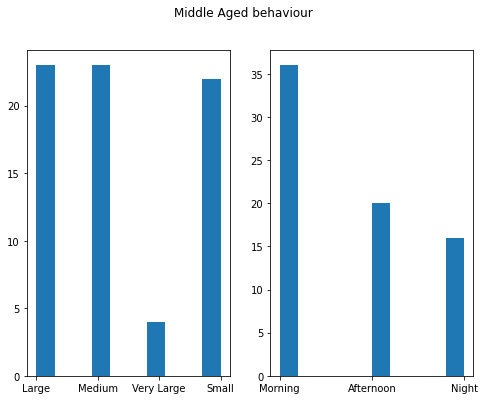

In [137]:
fig, axs = plt.subplots(1,2, figsize=(8,6))
fig.suptitle('Middle Aged behaviour')
axs[0].hist(data_clean[data_clean['Age group'] == 'Middle Aged'][['Bag Size']])
axs[1].hist(data_clean[data_clean['Age group'] == 'Middle Aged'][['Time of the Day']])

plt.show()

In [ ]:
# Data enrichment

# Temperature?
# Poverty rate?

In [36]:
def temperature(row):
    if row == 'Morning':
        return 25
    elif row == 'Night':
        return 18
    else:
        return 27

In [42]:
def poverty(row):
    if row == 'Old':
        return 17.5
    elif row == 'Middle Aged':
        return 14.9
    else:
        return 19.1

In [39]:
data_clean['Temperature'] = data_clean['Time of the Day'].apply(temperature)

<ipython-input-39-1afd7d7207bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Temperature'] = data_clean['Time of the Day'].apply(temperature)


In [43]:
data_clean['Poverty Rate'] = data_clean['Age group'].apply(poverty)

<ipython-input-43-3f328ff41cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Poverty Rate'] = data_clean['Age group'].apply(poverty)


In [44]:
# Statistical analysis

data_clean.head()

# naive bayes ( P (Small|Young))
# 

,index,Alone?,Confidence,Gender,Bag Size,Age group,Time of the Day,Temperature,Poverty Rate
0,0,Alone,95,F,Medium,Old,Morning,25,17.5
1,1,Alone,90,F,Large,Middle Aged,Morning,25,14.9
2,2,Alone,95,M,Small,Old,Morning,25,17.5
3,3,Alone,95,M,Large,Middle Aged,Morning,25,14.9
4,4,Alone,90,F,Medium,Middle Aged,Morning,25,14.9


In [87]:
# contigency table

test = data_clean[['Age group','Bag Size']]

test = pd.get_dummies(test, columns=['Bag Size'])

test = test.groupby('Age group').agg('sum').reset_index()

In [88]:
test

,Age group,Bag Size_Large,Bag Size_Medium,Bag Size_Small,Bag Size_Very Large
0,Middle Aged,23,23,22,4
1,Old,3,9,6,1
2,Young,1,6,14,1


In [95]:
# bayes theorem (P (S|Y))

p_young = 22/113
p_small = 44/113

p_young_small = 14/113

p_young_given_small = p_young_small/p_small

print('The probability of the person being young given that it carries a small bag is: ' + str(p_young_given_small))

p_old = 19/113

p_very_large = 6/113

p_old_very_large = 1/113

p_old_given_very_large = p_old_very_large/p_very_large

print('The probability of the person being old given that it carries a very large bag is: ' + str(p_old_given_very_large))

The probability of the person being young given that it carries a small bag is: 0.3181818181818182
The probability of the person being old given that it carries a very large bag is: 0.16666666666666666


In [107]:
test2 = data_clean[['Bag Size','Time of the Day']]
test2

,Bag Size,Time of the Day
0,Medium,Morning
1,Large,Morning
2,Small,Morning
3,Large,Morning
4,Medium,Morning
...,...,...
108,Small,Night
109,Small,Night
110,Small,Night
111,Medium,Night


In [108]:
test2 = pd.get_dummies(test2, columns=['Time of the Day'])

test2 = test2.groupby('Bag Size').agg('sum').reset_index()

In [109]:
test2

,Bag Size,Time of the Day_Afternoon,Time of the Day_Morning,Time of the Day_Night
0,Large,6,12,9
1,Medium,9,17,12
2,Small,16,19,7
3,Very Large,4,2,0


In [111]:
# probability of small given that is morning

# probability of small given that is night

p_small = 42/113
p_morning = 50/113

p_small_morning = 19/113

p_small_given_morning = p_small_morning/p_morning

print('The probability of the person carry a small bag given that it is morning: ' + str(p_small_given_morning))

p_small = 42/113

p_night = 28/113

p_small_night = 7/113

p_small_given_night = p_small_night/p_night

print('The probability of the person carry a small bag given that is night: ' + str(p_small_given_night))

The probability of the person carry a small bag given that it is morning: 0.38
The probability of the person carry a small bag given that is night: 0.25


In [ ]:
# Downloading data for Tableau